In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

## Plot a sin wave

In [59]:
SAMPLING_RATE = 44000

def get_sine_wave(freq,duration):
    
    x = np.linspace(0, duration, SAMPLING_RATE*duration)
    frequencies = x * freq
    y = np.sin((2*np.pi)*frequencies)
    print(len(y))
    return x,y
    
    

88000


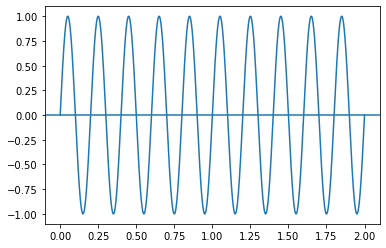

In [60]:
x,y = get_sine_wave(5,2)
plt.plot(x,y)
plt.axhline(0)

## Amplitute spectrum

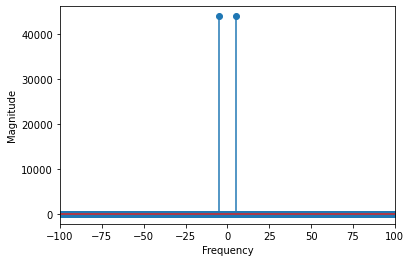

In [61]:
X = fftpack.fft(y)
freqs = fftpack.fftfreq(len(y)) * SAMPLING_RATE
plt.stem(freqs,np.abs(X))
plt.xlim(-100,100)
plt.xlabel('Frequency')
plt.ylabel("Magnitude")
plt.show()

## Phase spectrum

In [74]:
threshold = np.max(np.abs(X))/1000

X[np.abs(X) < threshold] = 0
phase_1 = np.arctan2(X.imag, X.real) * 180 / np.pi

(-10.0, 10.0)

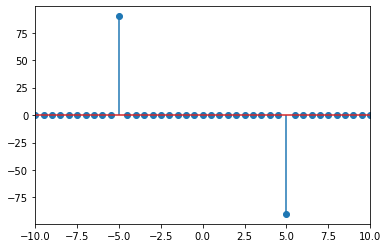

In [75]:
plt.stem(freqs,phase_1)
plt.xlim(-10,10)

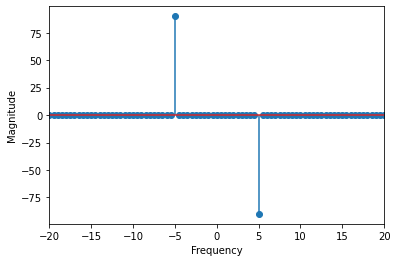

In [76]:
plt.stem(freqs,np.angle(X) *(180/np.pi))
plt.xlabel('Frequency')
plt.ylabel("Magnitude")
plt.xlim(-20,20)
plt.show()

## Construct the signal back

In [17]:
Xinv = fftpack.ifft(X)

/opt/anaconda3/envs/audiobasics/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


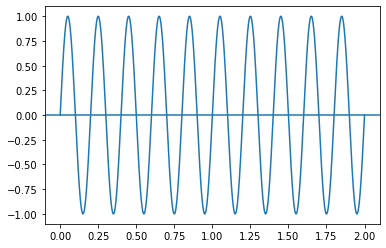

In [20]:
plt.plot(x,Xinv)
plt.axhline(0)

### Construct a complex wave

44000
44000


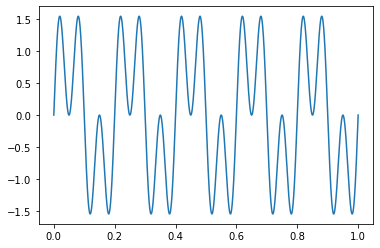

In [29]:
x,first_tone = get_sine_wave(5,1)
x,second_tone = get_sine_wave(15,1)
mixed_tone = first_tone + second_tone
plt.plot(x,mixed_tone)

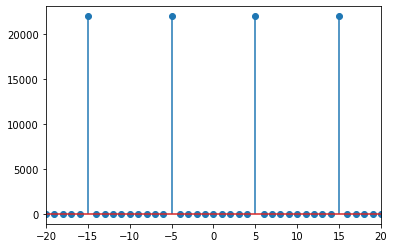

In [39]:
X = fftpack.fft(mixed_tone)
freq = fftpack.fftfreq(len(mixed_tone),d=1/SAMPLING_RATE) 
plt.stem(freq,np.abs(X))
plt.xlim(-20,20)
plt.show()

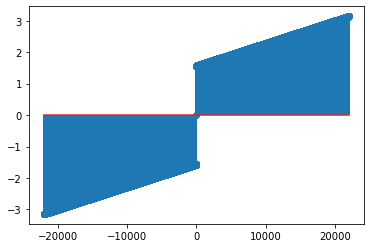

In [36]:
plt.stem(freq,np.angle(X))
plt.show()

### Inverse transform

/opt/anaconda3/envs/audiobasics/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


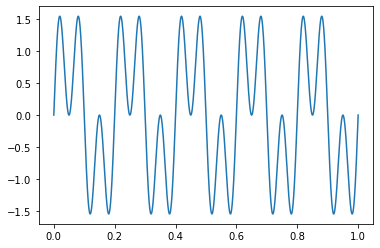

In [37]:
Xinv = fftpack.ifft(X)
plt.plot(x,Xinv)

## Decompose complex singal to corresponding waves using FFT

Text(0.5, 1.0, 'Sine wave 2')

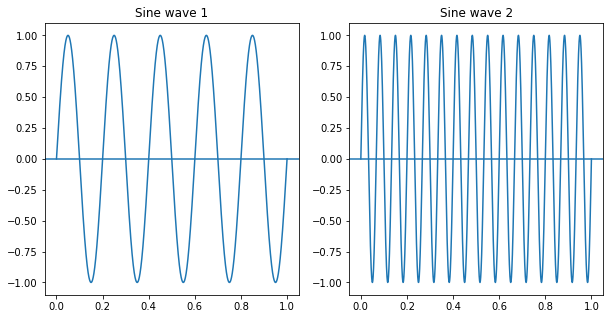

In [56]:
AMP = np.abs(X[15])/(SAMPLING_RATE/2)
freq1 = 5   ##from the frequency spectrum
freq2 = 15  ##from the frequency spectrum
t = np.linspace(0, 1, SAMPLING_RATE*1)
sine1 = AMP * np.sin(2*np.pi*freq1*t)
sine2 =  AMP * np.sin(2*np.pi*freq2*t)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(t,sine1)
plt.axhline(0)
plt.title("Sine wave 1")

plt.subplot(1,2,2)
plt.plot(t,sine2)
plt.axhline(0)
plt.title("Sine wave 2")